In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "/kaggle/input/garbage-classification/Garbage classification"

classes = os.listdir(dir_example)
print(classes)

['Garbage classification']


In [5]:
dir_example = "/kaggle/input/garbage-classification/Garbage classification/Garbage classification"
train_classes = os.listdir(dir_example)
print(train_classes)

['metal', 'glass', 'paper', 'trash', 'cardboard', 'plastic']


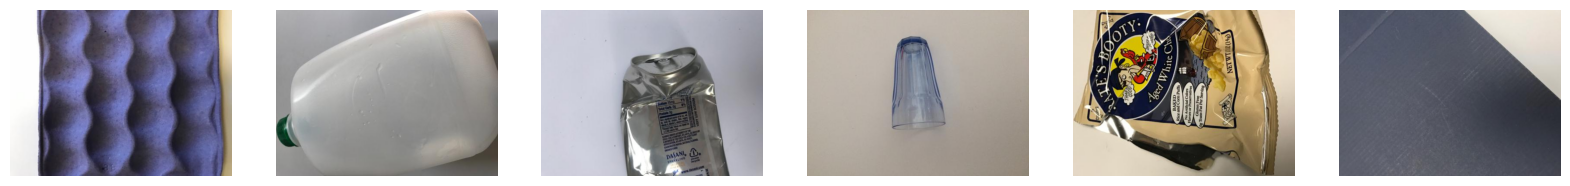

In [6]:
# dir_with_examples = "Smart-Garbage-Segregation/visualize"
# files_per_row = 6
# files_in_dir = os.listdir(dir_with_examples)
# number_of_cols = files_per_row
# number_of_rows = int(len(files_in_dir)/number_of_cols)
# fig,axs = plt.subplots(number_of_rows,number_of_cols)
# fig.set_size_inches(20,15,forward = True)
# try:
#     for i in range(0,len(files_in_dir)):
#         file_name = files_in_dir[i]
#         image = Image.open(f'{dir_with_examples}/{file_name}')
#         row = math.floor(i/files_per_row)
#         col = i%files_per_row
#         axs[col].imshow(image)
#         axs[col].axis('off')
# except:
#     pass
# plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-06-13 22:19:44.086893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749853184.347587      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749853184.423570      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
train = "/kaggle/input/garbage-classification/Garbage classification/Garbage classification"

In [11]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2527 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [12]:
for image_batch,label_batch in train_generator:
    break
image_batch.shape,label_batch.shape

((32, 300, 300, 3), (32,))

In [13]:
# test_generator = ImageDataGenerator(rescale = 1./255)
# test_generator= test_generator.flow_from_directory(test,target_size = (300,300),batch_size = 32,class_mode = 'sparse')
# test_labels = (test_generator.class_indices)
# print(test_labels,'\n')
# test_labels = dict((v,k) for k,v in test_labels.items())
# print(test_labels)

NameError: name 'test' is not defined

In [14]:
import tensorflow as tf
# or
import torch


In [15]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('Labels.txt','w') as file:
    file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [17]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 43808)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       2,803,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:

model.fit(train_generator,
          epochs=10,
          steps_per_epoch=2184//32)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.6118 - loss: 1.0332
Epoch 2/10
 7/68 ━━━━━━━━━━━━━━━━━━━━ 2:56 3s/step - accuracy: 0.6460 - loss: 1.0451

KeyboardInterrupt: 

In [48]:

import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Probability: 0.7856411
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

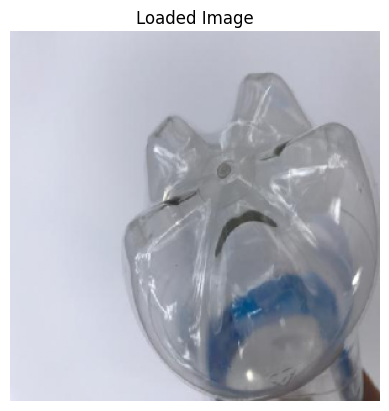

In [56]:
test_img = '/kaggle/input/garbage-classification/Garbage classification/Garbage classification/plastic/plastic430.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [53]:

classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 2.54 %
GLASS : 5.22 %
METAL : 72.72 %
PAPER : 9.92 %
PLASTIC : 7.32 %
TRASH : 2.28 %


In [57]:
# Save the full model
model.save('/kaggle/working/trash_model2.h5')
